In [126]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime
from pandas import Series
import scipy.stats as stats
import scipy.special as sp
from matplotlib import pyplot as plt
import seaborn as sns


## Visualization plays an important role in time series analysis and forecasting.

Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality that can influence the choice of model


In [2]:


s1=pd.read_csv("C:\\python\\ml\\temp.csv",parse_dates=[0])
#s1=pd.read_csv("C:\\python\\ml\\temp.csv")

s1.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
s1['Date']=pd.to_datetime(s1.Date,format='%Y-%m-%d %H:%M')
s1.Date[2]

Timestamp('1981-01-03 00:00:00')

In [4]:
s1.dtypes
#s1.Date.dt.month

Date    datetime64[ns]
Temp           float64
dtype: object

## Minimum Daily Temperatures Dataset (Time Series Visualization)



In [ ]:
s1.dtypes

In [5]:
s1.index=s1.Date
s1.index
s1.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


## Time Series Line plot

Text(0,0.5,'No.of TEmp')

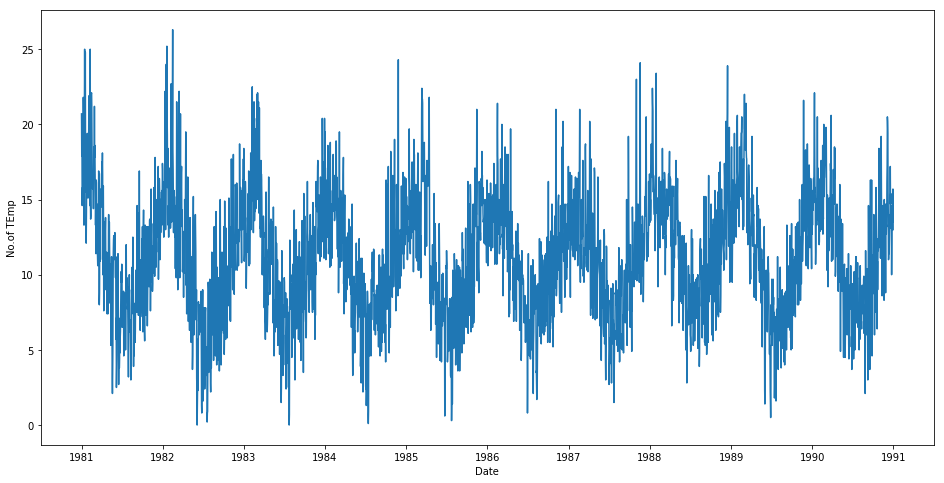

In [6]:
plt.figure(figsize=(16,8))
ts=s1['Temp']
a1=s1['Date']
plt.plot(a1,ts,label='Temp')
plt.xlabel("Date")
plt.ylabel("No.of TEmp")

In [ ]:
#s1['Temp']=pd.to_numeric(s1['Temp'])
#s1.dtypes


In [9]:
s2=s1.copy()
s1.drop(['Date'],axis=1)
s1.head()
s2.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


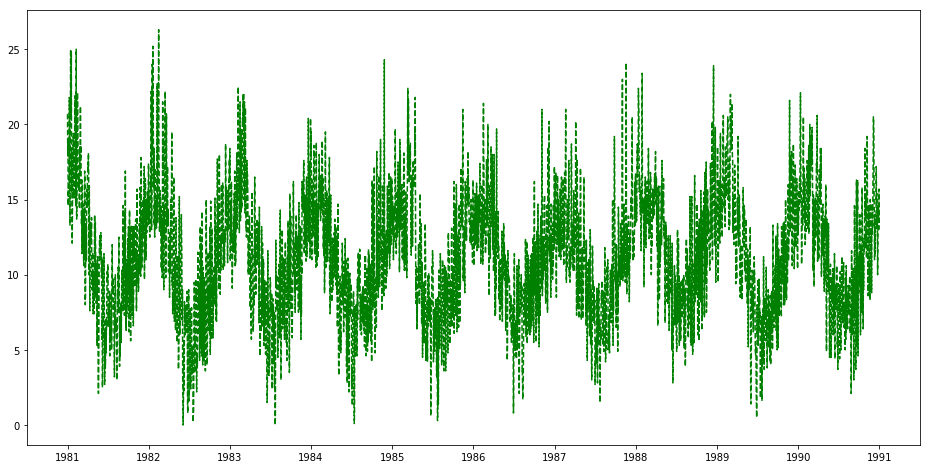

In [8]:
# to chnage line plot style
plt.figure(figsize=(16,8))
ts=s1['Temp']
plt.plot(ts,label='Temp',color='green', linestyle='dashed')


## Temp spans over 10 years,group data by year and create a line plot 

In [53]:
from pandas import TimeGrouper
from pandas import DataFrame
grp=s1.groupby(TimeGrouper('A')).groups
grp


C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


{Timestamp('1981-12-31 00:00:00', freq='A-DEC'): 365,
 Timestamp('1982-12-31 00:00:00', freq='A-DEC'): 730,
 Timestamp('1983-12-31 00:00:00', freq='A-DEC'): 1095,
 Timestamp('1984-12-31 00:00:00', freq='A-DEC'): 1460,
 Timestamp('1985-12-31 00:00:00', freq='A-DEC'): 1825,
 Timestamp('1986-12-31 00:00:00', freq='A-DEC'): 2190,
 Timestamp('1987-12-31 00:00:00', freq='A-DEC'): 2555,
 Timestamp('1988-12-31 00:00:00', freq='A-DEC'): 2920,
 Timestamp('1989-12-31 00:00:00', freq='A-DEC'): 3285,
 Timestamp('1990-12-31 00:00:00', freq='A-DEC'): 3650}

In [ ]:
y1=DataFrame()
for name,group in grp:
    y1[name.year]= group.values
y1.plot(subplots=True, legend=False)
plt.show()

## Time Series Histogram and Density Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BAEB898>]],
      dtype=object)

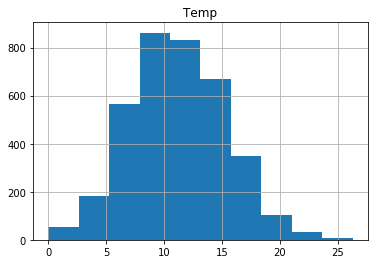

In [10]:
s1.hist()

In [11]:
s1.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [12]:
# split date into day, year, month
for im in s1:
    s1['year']=s1.Date.dt.year
    s1['Month']=s1.Date.dt.month
    s1['day']=s1.Date.dt.day
    print(im)

Date
Temp


In [13]:
s1.head()

,Date,Temp,year,Month,day
Date,,,,,
1981-01-01,1981-01-01,20.7,1981,1,1
1981-01-02,1981-01-02,17.9,1981,1,2
1981-01-03,1981-01-03,18.8,1981,1,3
1981-01-04,1981-01-04,14.6,1981,1,4
1981-01-05,1981-01-05,15.8,1981,1,5


## Density plot

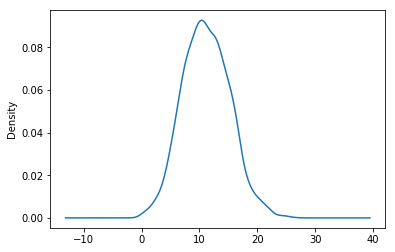

In [14]:
s1['Temp'].plot(kind='kde')
plt.show()

In [ ]:
s1['Temp'].mean()

## Time Series Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.


## Boxplot always support dataframe type , not series type

In [18]:
for im in s1:
    s2['year']=s1.Date.dt.year
s2.head()

,Date,Temp,year
Date,,,
1981-01-01,1981-01-01,20.7,1981
1981-01-02,1981-01-02,17.9,1981
1981-01-03,1981-01-03,18.8,1981
1981-01-04,1981-01-04,14.6,1981
1981-01-05,1981-01-05,15.8,1981


In [44]:

#a2=pd.DataFrame(s1['year'])  # it need to convert series type to dataframe type
a3=s2.groupby('year')['Temp'].sum().reset_index()
#print(a3)
a6=pd.DataFrame(a3)
a6.head()







,year,Temp
0,1981,4203.8
1,1982,3936.0
2,1983,4083.4
3,1984,3866.0
4,1985,4065.2


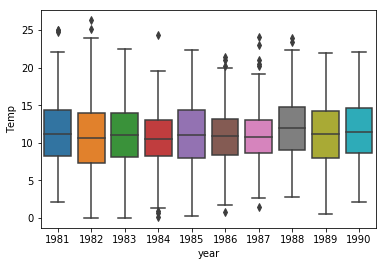

In [43]:
sns.boxplot(s2.year,s2.Temp,data=s2)

In [58]:
from pandas import concat
one_year = s1['1990']
gro5 = one_year.groupby(TimeGrouper('M')).groups
gro5

C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


{Timestamp('1990-01-31 00:00:00', freq='M'): 31,
 Timestamp('1990-02-28 00:00:00', freq='M'): 59,
 Timestamp('1990-03-31 00:00:00', freq='M'): 90,
 Timestamp('1990-04-30 00:00:00', freq='M'): 120,
 Timestamp('1990-05-31 00:00:00', freq='M'): 151,
 Timestamp('1990-06-30 00:00:00', freq='M'): 181,
 Timestamp('1990-07-31 00:00:00', freq='M'): 212,
 Timestamp('1990-08-31 00:00:00', freq='M'): 243,
 Timestamp('1990-09-30 00:00:00', freq='M'): 273,
 Timestamp('1990-10-31 00:00:00', freq='M'): 304,
 Timestamp('1990-11-30 00:00:00', freq='M'): 334,
 Timestamp('1990-12-31 00:00:00', freq='M'): 365}

In [62]:
s1.head()

,Date,Temp,year,Month,day
Date,,,,,
1981-01-01,1981-01-01,20.7,1981,1,1
1981-01-02,1981-01-02,17.9,1981,1,2
1981-01-03,1981-01-03,18.8,1981,1,3
1981-01-04,1981-01-04,14.6,1981,1,4
1981-01-05,1981-01-05,15.8,1981,1,5


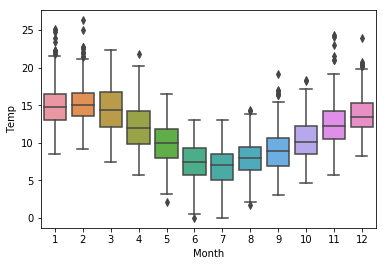

In [65]:
# Monthwise datas for all year
sns.boxplot(x=s1.Month,y=s1.Temp,data=s1)

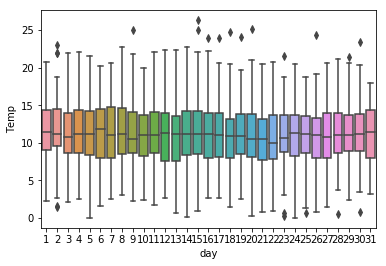

In [66]:
# daywise datas for all year
sns.boxplot(x=s1.day,y=s1.Temp,data=s1)

In [76]:
a4=s1.groupby(['year','Month'])['Temp'].mean()
a4
a7=pd.DataFrame(a4)
a7.head()

Temp
year Month           
1981 1      17.712903
     2      17.678571
     3      13.500000
     4      12.356667
     5       9.490323

In [78]:
# daywise datas for all year
#sns.boxplot(x=a7.Month,y=a7.Temp,data=a7)
a7.columns

Index(['Temp'], dtype='object')

In [101]:
grp=s1.groupby(['year','Month'])
for name,group in grp:
    print(name)
    print(group)
    print()

(1981, 1)
                 Date  Temp  year  Month  day
Date                                         
1981-01-01 1981-01-01  20.7  1981      1    1
1981-01-02 1981-01-02  17.9  1981      1    2
1981-01-03 1981-01-03  18.8  1981      1    3
1981-01-04 1981-01-04  14.6  1981      1    4
1981-01-05 1981-01-05  15.8  1981      1    5
1981-01-06 1981-01-06  15.8  1981      1    6
1981-01-07 1981-01-07  15.8  1981      1    7
1981-01-08 1981-01-08  17.4  1981      1    8
1981-01-09 1981-01-09  21.8  1981      1    9
1981-01-10 1981-01-10  20.0  1981      1   10
1981-01-11 1981-01-11  16.2  1981      1   11
1981-01-12 1981-01-12  13.3  1981      1   12
1981-01-13 1981-01-13  16.7  1981      1   13
1981-01-14 1981-01-14  21.5  1981      1   14
1981-01-15 1981-01-15  25.0  1981      1   15
1981-01-16 1981-01-16  20.7  1981      1   16
1981-01-17 1981-01-17  20.6  1981      1   17
1981-01-18 1981-01-18  24.8  1981      1   18
1981-01-19 1981-01-19  17.7  1981      1   19
1981-01-20 1981-01-20  1

                 Date  Temp  year  Month  day
Date                                         
1983-07-01 1983-07-01   8.5  1983      7    1
1983-07-02 1983-07-02   9.8  1983      7    2
1983-07-03 1983-07-03   9.5  1983      7    3
1983-07-04 1983-07-04   7.2  1983      7    4
1983-07-05 1983-07-05   8.1  1983      7    5
1983-07-06 1983-07-06   8.0  1983      7    6
1983-07-07 1983-07-07   8.5  1983      7    7
1983-07-08 1983-07-08   8.8  1983      7    8
1983-07-09 1983-07-09   8.3  1983      7    9
1983-07-10 1983-07-10   2.4  1983      7   10
1983-07-11 1983-07-11   4.9  1983      7   11
1983-07-12 1983-07-12   5.9  1983      7   12
1983-07-13 1983-07-13   6.7  1983      7   13
1983-07-14 1983-07-14   8.4  1983      7   14
1983-07-15 1983-07-15   6.5  1983      7   15
1983-07-16 1983-07-16   7.9  1983      7   16
1983-07-17 1983-07-17   4.1  1983      7   17
1983-07-18 1983-07-18   5.4  1983      7   18
1983-07-19 1983-07-19   7.5  1983      7   19
1983-07-20 1983-07-20   3.9  1983 

                 Date  Temp  year  Month  day
Date                                         
1984-12-01 1984-12-01  12.6  1984     12    1
1984-12-02 1984-12-02  10.8  1984     12    2
1984-12-03 1984-12-03   9.1  1984     12    3
1984-12-04 1984-12-04  11.0  1984     12    4
1984-12-05 1984-12-05  13.0  1984     12    5
1984-12-06 1984-12-06  12.8  1984     12    6
1984-12-07 1984-12-07   9.9  1984     12    7
1984-12-08 1984-12-08  11.6  1984     12    8
1984-12-09 1984-12-09  10.5  1984     12    9
1984-12-10 1984-12-10  15.9  1984     12   10
1984-12-11 1984-12-11  12.2  1984     12   11
1984-12-12 1984-12-12  13.0  1984     12   12
1984-12-13 1984-12-13  12.5  1984     12   13
1984-12-14 1984-12-14  12.5  1984     12   14
1984-12-15 1984-12-15  11.4  1984     12   15
1984-12-16 1984-12-16  12.1  1984     12   16
1984-12-17 1984-12-17  16.8  1984     12   17
1984-12-18 1984-12-18  12.1  1984     12   18
1984-12-19 1984-12-19  11.3  1984     12   19
1984-12-20 1984-12-20  10.4  1984 

                 Date  Temp  year  Month  day
Date                                         
1986-09-01 1986-09-01   8.3  1986      9    1
1986-09-02 1986-09-02  10.6  1986      9    2
1986-09-03 1986-09-03   9.1  1986      9    3
1986-09-04 1986-09-04  11.3  1986      9    4
1986-09-05 1986-09-05  10.9  1986      9    5
1986-09-06 1986-09-06   8.9  1986      9    6
1986-09-07 1986-09-07   6.3  1986      9    7
1986-09-08 1986-09-08   9.0  1986      9    8
1986-09-09 1986-09-09   6.1  1986      9    9
1986-09-10 1986-09-10   9.1  1986      9   10
1986-09-11 1986-09-11   9.6  1986      9   11
1986-09-12 1986-09-12   6.0  1986      9   12
1986-09-13 1986-09-13  10.0  1986      9   13
1986-09-14 1986-09-14  11.0  1986      9   14
1986-09-15 1986-09-15   6.2  1986      9   15
1986-09-16 1986-09-16   8.3  1986      9   16
1986-09-17 1986-09-17  11.3  1986      9   17
1986-09-18 1986-09-18  11.3  1986      9   18
1986-09-19 1986-09-19   6.7  1986      9   19
1986-09-20 1986-09-20   6.6  1986 

                 Date  Temp  year  Month  day
Date                                         
1988-06-01 1988-06-01  10.0  1988      6    1
1988-06-02 1988-06-02  11.0  1988      6    2
1988-06-03 1988-06-03  11.1  1988      6    3
1988-06-04 1988-06-04  12.6  1988      6    4
1988-06-05 1988-06-05  10.2  1988      6    5
1988-06-06 1988-06-06  11.1  1988      6    6
1988-06-07 1988-06-07   8.7  1988      6    7
1988-06-08 1988-06-08   9.5  1988      6    8
1988-06-09 1988-06-09   9.7  1988      6    9
1988-06-10 1988-06-10   8.2  1988      6   10
1988-06-11 1988-06-11   5.0  1988      6   11
1988-06-12 1988-06-12   6.5  1988      6   12
1988-06-13 1988-06-13  12.1  1988      6   13
1988-06-14 1988-06-14   8.9  1988      6   14
1988-06-15 1988-06-15   6.1  1988      6   15
1988-06-16 1988-06-16   2.8  1988      6   16
1988-06-17 1988-06-17   3.7  1988      6   17
1988-06-18 1988-06-18   6.8  1988      6   18
1988-06-19 1988-06-19   6.6  1988      6   19
1988-06-20 1988-06-20   7.0  1988 

                 Date  Temp  year  Month  day
Date                                         
1990-06-01 1990-06-01   9.7  1990      6    1
1990-06-02 1990-06-02   8.2  1990      6    2
1990-06-03 1990-06-03   8.4  1990      6    3
1990-06-04 1990-06-04   8.5  1990      6    4
1990-06-05 1990-06-05  10.4  1990      6    5
1990-06-06 1990-06-06   6.8  1990      6    6
1990-06-07 1990-06-07   6.0  1990      6    7
1990-06-08 1990-06-08   6.6  1990      6    8
1990-06-09 1990-06-09   7.8  1990      6    9
1990-06-10 1990-06-10  10.3  1990      6   10
1990-06-11 1990-06-11   7.2  1990      6   11
1990-06-12 1990-06-12   7.4  1990      6   12
1990-06-13 1990-06-13  11.4  1990      6   13
1990-06-14 1990-06-14   5.4  1990      6   14
1990-06-15 1990-06-15   4.4  1990      6   15
1990-06-16 1990-06-16   6.4  1990      6   16
1990-06-17 1990-06-17   9.3  1990      6   17
1990-06-18 1990-06-18   7.7  1990      6   18
1990-06-19 1990-06-19   8.1  1990      6   19
1990-06-20 1990-06-20   8.3  1990 

In [110]:
# To get individual grop

grp1=s1.groupby('year')

grp1.get_group(1985)


,Date,Temp,year,Month,day
Date,,,,,
1985-01-01,1985-01-01,13.3,1985,1,1
1985-01-02,1985-01-02,15.2,1985,1,2
1985-01-03,1985-01-03,13.1,1985,1,3
1985-01-04,1985-01-04,12.7,1985,1,4
1985-01-05,1985-01-05,14.6,1985,1,5
1985-01-06,1985-01-06,11.0,1985,1,6
1985-01-07,1985-01-07,13.2,1985,1,7
1985-01-08,1985-01-08,12.2,1985,1,8
1985-01-09,1985-01-09,14.4,1985,1,9


## Groupby based on Month , Year

In [116]:
grp2=s1.groupby(['Month','year'])

grp2.get_group((1,1985))

,Date,Temp,year,Month,day
Date,,,,,
1985-01-01,1985-01-01,13.3,1985,1,1
1985-01-02,1985-01-02,15.2,1985,1,2
1985-01-03,1985-01-03,13.1,1985,1,3
1985-01-04,1985-01-04,12.7,1985,1,4
1985-01-05,1985-01-05,14.6,1985,1,5
1985-01-06,1985-01-06,11.0,1985,1,6
1985-01-07,1985-01-07,13.2,1985,1,7
1985-01-08,1985-01-08,12.2,1985,1,8
1985-01-09,1985-01-09,14.4,1985,1,9


In [119]:
grp2=s1.groupby(['Month','year']).mean()
f1=pd.DataFrame(grp2)
f1.head()

Temp   day
Month year                 
1     1981  17.712903  16.0
      1982  16.567742  16.0
      1983  13.180645  16.0
      1984  14.309677  16.0
      1985  14.219355  16.0

In [120]:
f1.columns

Index(['Temp', 'day'], dtype='object')

In [122]:
grp3=s1.groupby(['Month','year'])
for name,i2 in grp:
    print(name)
    print(i2)
    print()

(1981, 1)
                 Date  Temp  year  Month  day
Date                                         
1981-01-01 1981-01-01  20.7  1981      1    1
1981-01-02 1981-01-02  17.9  1981      1    2
1981-01-03 1981-01-03  18.8  1981      1    3
1981-01-04 1981-01-04  14.6  1981      1    4
1981-01-05 1981-01-05  15.8  1981      1    5
1981-01-06 1981-01-06  15.8  1981      1    6
1981-01-07 1981-01-07  15.8  1981      1    7
1981-01-08 1981-01-08  17.4  1981      1    8
1981-01-09 1981-01-09  21.8  1981      1    9
1981-01-10 1981-01-10  20.0  1981      1   10
1981-01-11 1981-01-11  16.2  1981      1   11
1981-01-12 1981-01-12  13.3  1981      1   12
1981-01-13 1981-01-13  16.7  1981      1   13
1981-01-14 1981-01-14  21.5  1981      1   14
1981-01-15 1981-01-15  25.0  1981      1   15
1981-01-16 1981-01-16  20.7  1981      1   16
1981-01-17 1981-01-17  20.6  1981      1   17
1981-01-18 1981-01-18  24.8  1981      1   18
1981-01-19 1981-01-19  17.7  1981      1   19
1981-01-20 1981-01-20  1

1983-01-31 1983-01-31  14.0  1983      1   31

(1983, 2)
                 Date  Temp  year  Month  day
Date                                         
1983-02-01 1983-02-01  18.1  1983      2    1
1983-02-02 1983-02-02  17.3  1983      2    2
1983-02-03 1983-02-03  13.0  1983      2    3
1983-02-04 1983-02-04  16.0  1983      2    4
1983-02-05 1983-02-05  14.9  1983      2    5
1983-02-06 1983-02-06  16.2  1983      2    6
1983-02-07 1983-02-07  20.3  1983      2    7
1983-02-08 1983-02-08  22.5  1983      2    8
1983-02-09 1983-02-09  17.2  1983      2    9
1983-02-10 1983-02-10  15.9  1983      2   10
1983-02-11 1983-02-11  16.8  1983      2   11
1983-02-12 1983-02-12  13.8  1983      2   12
1983-02-13 1983-02-13  12.8  1983      2   13
1983-02-14 1983-02-14  14.0  1983      2   14
1983-02-15 1983-02-15  17.5  1983      2   15
1983-02-16 1983-02-16  21.5  1983      2   16
1983-02-17 1983-02-17  16.8  1983      2   17
1983-02-18 1983-02-18  13.6  1983      2   18
1983-02-19 1983-02-19  

                 Date  Temp  year  Month  day
Date                                         
1984-03-01 1984-03-01  12.6  1984      3    1
1984-03-02 1984-03-02   8.8  1984      3    2
1984-03-03 1984-03-03  10.5  1984      3    3
1984-03-04 1984-03-04  12.1  1984      3    4
1984-03-05 1984-03-05  14.5  1984      3    5
1984-03-06 1984-03-06  19.5  1984      3    6
1984-03-07 1984-03-07  14.0  1984      3    7
1984-03-08 1984-03-08  13.8  1984      3    8
1984-03-09 1984-03-09  10.5  1984      3    9
1984-03-10 1984-03-10  13.8  1984      3   10
1984-03-11 1984-03-11  11.4  1984      3   11
1984-03-12 1984-03-12  15.6  1984      3   12
1984-03-13 1984-03-13  11.1  1984      3   13
1984-03-14 1984-03-14  12.1  1984      3   14
1984-03-15 1984-03-15  14.2  1984      3   15
1984-03-16 1984-03-16  10.9  1984      3   16
1984-03-17 1984-03-17  14.2  1984      3   17
1984-03-18 1984-03-18  13.8  1984      3   18
1984-03-19 1984-03-19  15.1  1984      3   19
1984-03-20 1984-03-20  14.0  1984 

                 Date  Temp  year  Month  day
Date                                         
1985-08-01 1985-08-01   7.0  1985      8    1
1985-08-02 1985-08-02   5.1  1985      8    2
1985-08-03 1985-08-03   6.3  1985      8    3
1985-08-04 1985-08-04   6.9  1985      8    4
1985-08-05 1985-08-05  11.4  1985      8    5
1985-08-06 1985-08-06  10.4  1985      8    6
1985-08-07 1985-08-07  10.3  1985      8    7
1985-08-08 1985-08-08   9.2  1985      8    8
1985-08-09 1985-08-09   7.2  1985      8    9
1985-08-10 1985-08-10   7.5  1985      8   10
1985-08-11 1985-08-11   4.0  1985      8   11
1985-08-12 1985-08-12   5.6  1985      8   12
1985-08-13 1985-08-13   6.7  1985      8   13
1985-08-14 1985-08-14   8.4  1985      8   14
1985-08-15 1985-08-15  11.0  1985      8   15
1985-08-16 1985-08-16   8.4  1985      8   16
1985-08-17 1985-08-17   8.8  1985      8   17
1985-08-18 1985-08-18   8.6  1985      8   18
1985-08-19 1985-08-19   8.3  1985      8   19
1985-08-20 1985-08-20   4.0  1985 

                 Date  Temp  year  Month  day
Date                                         
1987-08-01 1987-08-01   9.0  1987      8    1
1987-08-02 1987-08-02   9.6  1987      8    2
1987-08-03 1987-08-03   8.0  1987      8    3
1987-08-04 1987-08-04   8.4  1987      8    4
1987-08-05 1987-08-05   8.1  1987      8    5
1987-08-06 1987-08-06   9.0  1987      8    6
1987-08-07 1987-08-07   5.3  1987      8    7
1987-08-08 1987-08-08   8.9  1987      8    8
1987-08-09 1987-08-09   8.7  1987      8    9
1987-08-10 1987-08-10   4.9  1987      8   10
1987-08-11 1987-08-11   7.0  1987      8   11
1987-08-12 1987-08-12   7.5  1987      8   12
1987-08-13 1987-08-13   7.0  1987      8   13
1987-08-14 1987-08-14   9.1  1987      8   14
1987-08-15 1987-08-15  11.8  1987      8   15
1987-08-16 1987-08-16   9.9  1987      8   16
1987-08-17 1987-08-17   5.6  1987      8   17
1987-08-18 1987-08-18   4.2  1987      8   18
1987-08-19 1987-08-19   4.3  1987      8   19
1987-08-20 1987-08-20   8.0  1987 

1989-10-31 1989-10-31   8.0  1989     10   31

(1989, 11)
                 Date  Temp  year  Month  day
Date                                         
1989-11-01 1989-11-01   8.1  1989     11    1
1989-11-02 1989-11-02  10.0  1989     11    2
1989-11-03 1989-11-03   8.5  1989     11    3
1989-11-04 1989-11-04  12.5  1989     11    4
1989-11-05 1989-11-05  15.0  1989     11    5
1989-11-06 1989-11-06  13.3  1989     11    6
1989-11-07 1989-11-07  11.0  1989     11    7
1989-11-08 1989-11-08  11.9  1989     11    8
1989-11-09 1989-11-09   8.3  1989     11    9
1989-11-10 1989-11-10   9.7  1989     11   10
1989-11-11 1989-11-11  11.3  1989     11   11
1989-11-12 1989-11-12  12.5  1989     11   12
1989-11-13 1989-11-13   9.4  1989     11   13
1989-11-14 1989-11-14  11.4  1989     11   14
1989-11-15 1989-11-15  13.2  1989     11   15
1989-11-16 1989-11-16  13.8  1989     11   16
1989-11-17 1989-11-17  16.0  1989     11   17
1989-11-18 1989-11-18  10.9  1989     11   18
1989-11-19 1989-11-19 

## Lag plot
Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t+1) on the y-axis

•If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
•If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
•Either relationship is good as they can be modeled


In [129]:
s2.head()

,Date,Temp,year
Date,,,
1981-01-01,1981-01-01,20.7,1981
1981-01-02,1981-01-02,17.9,1981
1981-01-03,1981-01-03,18.8,1981
1981-01-04,1981-01-04,14.6,1981
1981-01-05,1981-01-05,15.8,1981


C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


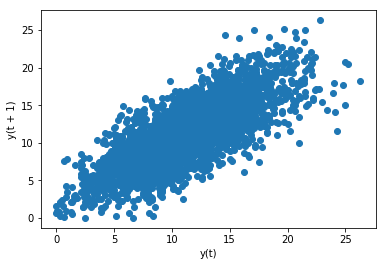

In [130]:
from pandas.tools.plotting import lag_plot
lag_plot(s2['Temp'])
plt.show()

## For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the Minimum Daily Temperatures dataset.

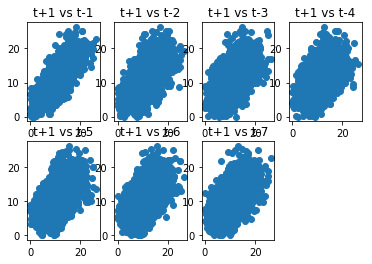

In [143]:
values = DataFrame(s2.Temp.values)
values
columns = [values]
columns
lags = 7
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
df=concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' +str(i))
df.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.show()

## Time Series Autocorrelation Plots
quantify the strength and type of relationship between observations and their lags.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function


C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


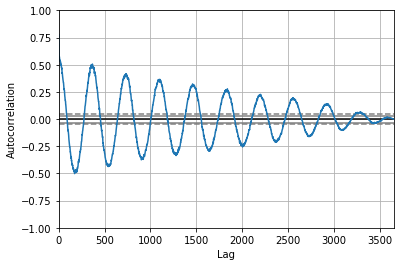

In [144]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(s1['Temp'])
plt.show()

In [147]:
s2.head()


,Date,Temp,year
Date,,,
1981-01-01,1981-01-01,20.7,1981
1981-01-02,1981-01-02,17.9,1981
1981-01-03,1981-01-03,18.8,1981
1981-01-04,1981-01-04,14.6,1981
1981-01-05,1981-01-05,15.8,1981


In [155]:
grp31=s1.groupby(['year']).sum()
for i,name in grp31 :
    #i['ya']=i.Date.dt.year
    print(i)
    print(name)
   

1981
                 Date  Temp  year  Month  day
Date                                         
1981-01-01 1981-01-01  20.7  1981      1    1
1981-01-02 1981-01-02  17.9  1981      1    2
1981-01-03 1981-01-03  18.8  1981      1    3
1981-01-04 1981-01-04  14.6  1981      1    4
1981-01-05 1981-01-05  15.8  1981      1    5
1981-01-06 1981-01-06  15.8  1981      1    6
1981-01-07 1981-01-07  15.8  1981      1    7
1981-01-08 1981-01-08  17.4  1981      1    8
1981-01-09 1981-01-09  21.8  1981      1    9
1981-01-10 1981-01-10  20.0  1981      1   10
1981-01-11 1981-01-11  16.2  1981      1   11
1981-01-12 1981-01-12  13.3  1981      1   12
1981-01-13 1981-01-13  16.7  1981      1   13
1981-01-14 1981-01-14  21.5  1981      1   14
1981-01-15 1981-01-15  25.0  1981      1   15
1981-01-16 1981-01-16  20.7  1981      1   16
1981-01-17 1981-01-17  20.6  1981      1   17
1981-01-18 1981-01-18  24.8  1981      1   18
1981-01-19 1981-01-19  17.7  1981      1   19
1981-01-20 1981-01-20  15.5  

In [160]:
grp41=s1.groupby(['year']).sum()
grp41


,Temp,Month,day
year,,,
1981,4203.8,2382,5738
1982,3936.0,2382,5738
1983,4083.4,2382,5738
1984,3866.0,2372,5736
1985,4065.2,2382,5738
1986,3943.2,2382,5738
1987,3961.4,2382,5738
1988,4369.8,2372,5736
1989,4110.6,2382,5738
